# Exploration of SEMA5B

In [2]:
cd ..

/cellar/users/agross/TCGA_Code/DX/Notebooks


In [3]:
import NotebookImport
from metaPCNA import *

importing IPython notebook from metaPCNA

importing IPython notebook from Imports

In [4]:
f_win.order().tail()

LOC283914    0.41
CST2         0.42
C16orf13     0.43
GABRD        0.47
SEMA5B       0.48
Name: fraction overexpressed\n(detrended), dtype: float64

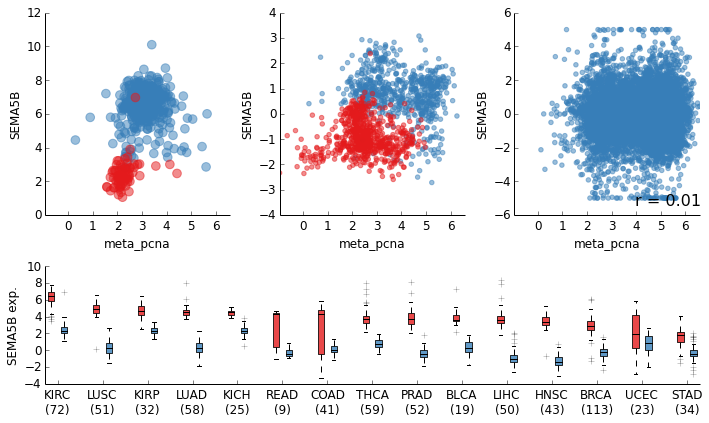

In [5]:
switch_plot('SEMA5B')

In [6]:
sema = [g for g in rna_df.index if g.startswith('SEMA')]
f = dx_rna.ix[sema].dropna()
f.join(f_win).sort(f_win.name)

,num_ox,num_dx,frac,p,fraction overexpressed (detrended)
SEMA6D,113,684,0.17,1.76e-74,-0.32
SEMA3D,155,684,0.23,1.19e-48,-0.27
SEMA3G,151,684,0.22,8.18e-51,-0.18
SEMA4A,298,684,0.44,8.66e-04,-0.14
SEMA3B,179,684,0.26,7.60e-37,-0.14
SEMA3E,173,684,0.25,1.30e-39,-0.14
SEMA5A,214,684,0.31,5.73e-23,-0.11
SEMA4D,344,684,0.50,9.09e-01,-0.09
SEMA6A,235,684,0.34,2.19e-16,-0.06
SEMA3C,282,684,0.41,5.09e-06,-0.05


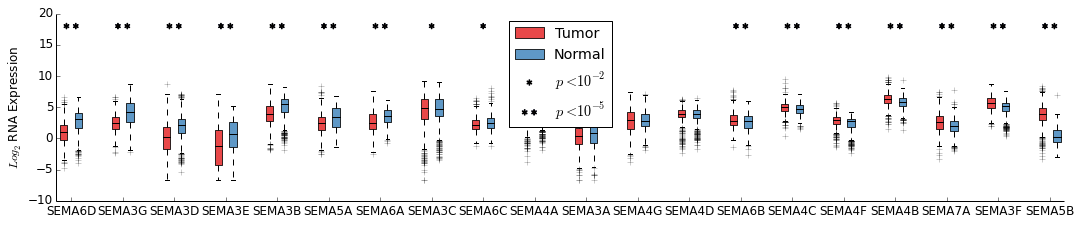

In [7]:
paired_boxplot_tumor_normal(matched_rna.ix[sema].clip(-9,10).T, 
                            order=list(f.frac.order().index))
prettify_ax(plt.gca())

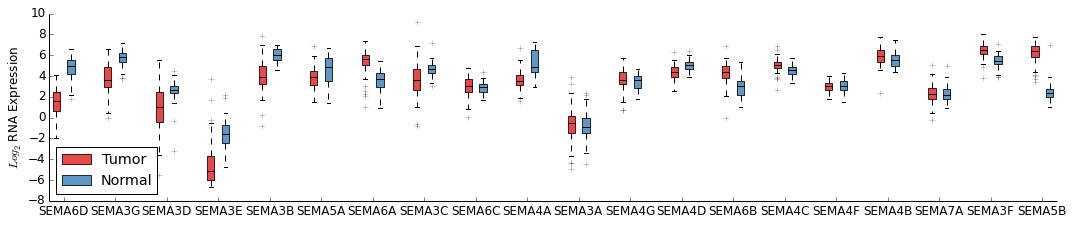

In [8]:
paired_boxplot_tumor_normal(matched_rna.ix[sema, ti(codes.str.startswith('KIRC'))].clip(-9,10).T, 
                            order=list(f.frac.order().index), sig=False)
prettify_ax(plt.gca())

In [10]:
plt.rcParams['font.size'] = 15

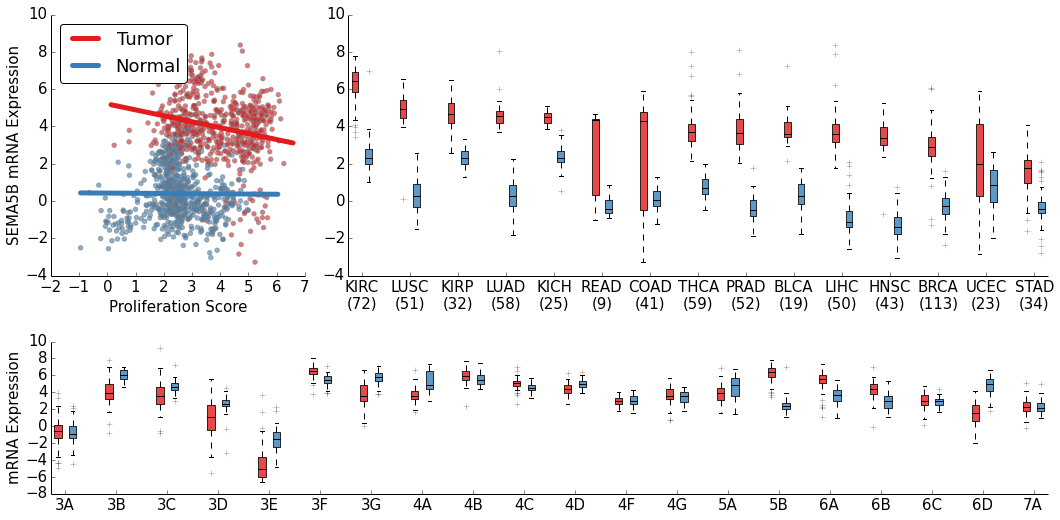

In [17]:
fig = plt.figure(figsize=(15, 7.5))
ax1 = plt.subplot2grid((5, 7), (0, 0), colspan=2, rowspan=3)
ax2 = plt.subplot2grid((5, 7), (0, 2), colspan=5, rowspan=3)
ax3 = plt.subplot2grid((5, 7), (3, 0), colspan=7, rowspan=2)

ax = ax1
cc = pd.Series(matched_tn.columns.get_level_values(1), 
               matched_tn.columns).map({'01': colors[0],
                                        '11': colors[1]})
series_scatter(meta_pcna_all, matched_tn.ix['SEMA5B'], zorder=1,
               ax=ax, ann=None, s=20, edgecolor='grey', linewidths=1,
               alpha=.6, color=cc)

line_args = {'lw':5, 'solid_capstyle':'round'}
l1, l2 = process_line_args(line_args)
x,y = meta_pcna_all[:,'01'], matched_tn.ix['SEMA5B'][:,'01']
reg = linear_regression(x,y)
line_me(reg['slope'], reg['intercept'], start=x.min(), end=x.max(),
            ax=ax, **l1)

x,y = meta_pcna_all[:,'11'], matched_tn.ix['SEMA5B'][:,'11']
reg = linear_regression(x,y)
line_me(reg['slope'], reg['intercept'], start=x.min(), end=x.max(),
            ax=ax, **l1)

ax1.legend(['Tumor','Normal'], loc='upper left', scatterpoints=0, markerscale=1.5,
          fancybox=True)
ax1.legend(['Tumor','Normal'], loc='upper left', scatterpoints=0, markerscale=1.5,
          fancybox=True)
ax1.set_xlabel('Proliferation Score')
prettify_ax(ax1)

paired_bp_tn_split(matched_rna.ix['SEMA5B'], codes, ax=ax2)
ax2.set_ylabel('')
ax1.set_ylabel('SEMA5B mRNA Expression')

paired_boxplot_tumor_normal(matched_rna.ix[sema, ti(codes.str.startswith('KIRC'))].clip(-9,10).T, 
                            order=sorted(sema), sig=False, ax=ax3)
ax3.set_xticklabels([l.get_text()[4:] for l in ax3.get_xticklabels()])
prettify_ax(ax3)
ax3.get_legend().set_visible(False)
ax3.set_ylabel('mRNA Expression')
fig.tight_layout()
fig.savefig(FIGDIR + 'SEMA_Fig.pdf')